In [1]:
import symbolic_modern_robotics as smr
import sympy as s
s.init_printing()

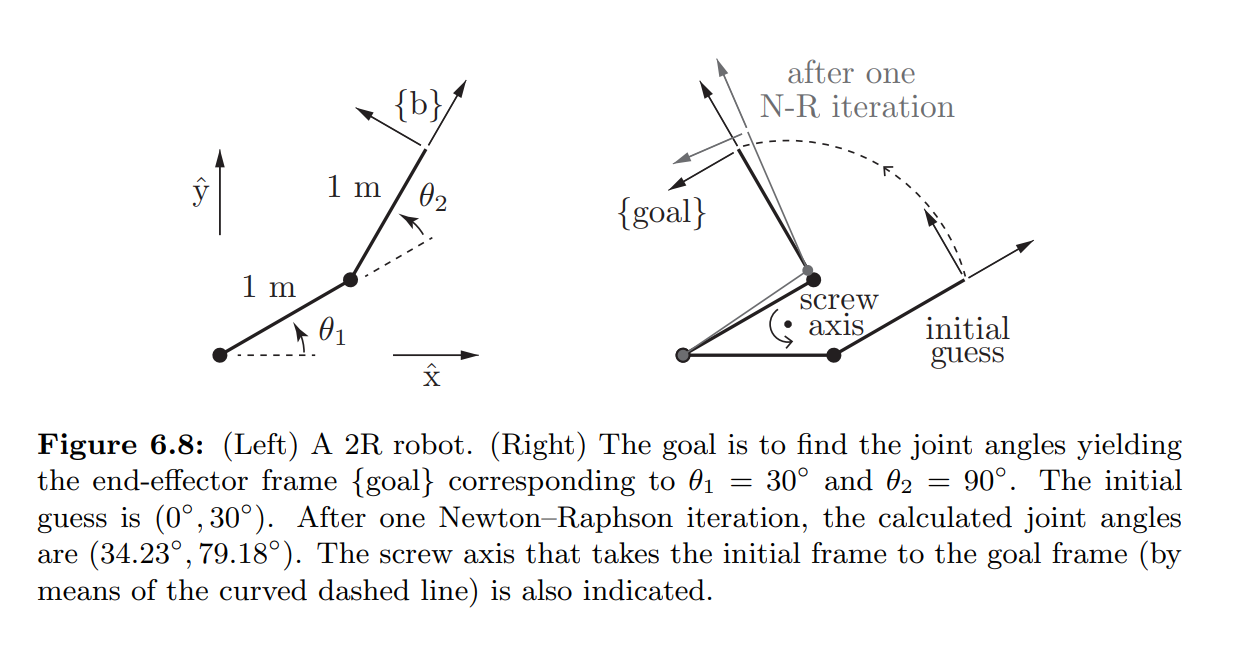

In [2]:
# Example 6.1
from IPython.display import Image
Image('exam_6.1_fig.PNG', width=500)

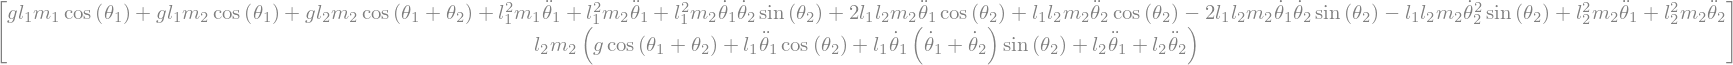

In [3]:
# 1-1. Find Forward Kinematics, Space PoE
l1,l2,g = s.symbols('l1,l2,g')
m1,m2 = s.symbols('m1,m2')
theta_1,theta_2,thetadot_1,thetadot_2,thetaddot_1,thetaddot_2 = s.symbols('theta_1,theta_2,thetadot_1,thetadot_2,thetaddot_1,thetaddot_2', positive=True)

thetalist = s.Matrix([theta_1,theta_2])
dthetalist = s.Matrix([thetadot_1,thetadot_2])
ddthetalist = s.Matrix([thetaddot_1,thetaddot_2])

M = s.Matrix([[1, 0, 0, l1+l2],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

M01 = s.Matrix([[1, 0, 0, l1],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])

M12 = s.Matrix([[1, 0, 0, l2],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])

Mlist = [M01, M12]

Slist = s.Matrix([[0, 0, 1, 0, 0, 0],
                  [0, 0, 1, 0, -l1, 0]]).T

Blist = s.Matrix([[0, 0, 1, 0, l1+l2, 0],
                  [0, 0, 1, 0, l2, 0]]).T

# Check Forward Kinematics
T01 = smr.MatrixExp6(smr.VecTose3(Slist[:, 0]*thetalist[0]))
T12 = smr.MatrixExp6(smr.VecTose3(Slist[:, 1]*thetalist[1]))
ForKinSpace = T01@T12@M
T01 = smr.MatrixExp6(smr.VecTose3(Blist[:, 0]*thetalist[0]))
T12 = smr.MatrixExp6(smr.VecTose3(Blist[:, 1]*thetalist[1]))
ForKinBody = M@T01@T12

G01 = s.diag(0,0,0, m1, m1, m1)
G12 = s.diag(0,0,0, m2, m2, m2)
Glist = [G01, G12]

g_vec = s.Matrix([0, -g, 0])
Ftip = s.Matrix([0,0,0,0,0,0])

tau, V, Vd = smr.InverseDynamics(thetalist, dthetalist, ddthetalist, g_vec, Ftip, Mlist, Glist, Slist)
tau

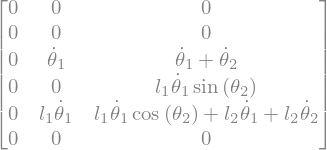

In [4]:
V

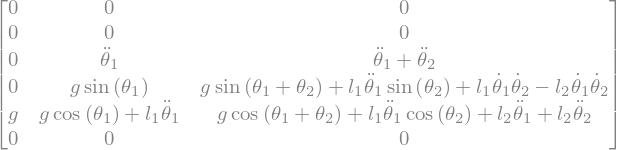

In [5]:
Vd

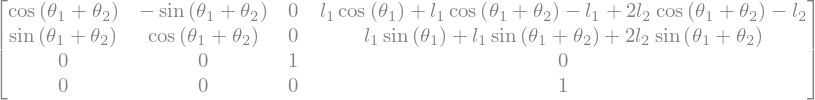

In [6]:
s.simplify(T01@T12@M)

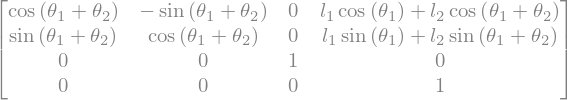

In [7]:
T01 = smr.MatrixExp6(smr.VecTose3(Blist[:, 0]*thetalist[0]))
T12 = smr.MatrixExp6(smr.VecTose3(Blist[:, 1]*thetalist[1]))
s.simplify(M@T01@T12)

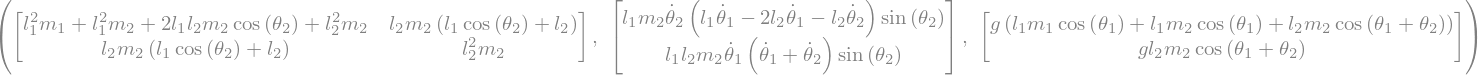

In [8]:
smr.get_EoM_from_T(tau, ddthetalist, g)